<a href="https://colab.research.google.com/github/santhalakshminarayana/face-recognition/blob/master/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/content/drive/My Drive/Colab Notebooks/Face_Recognition


60

{'angelamerkel', 'jinping', 'lakshminarayana', 'modi', 'putin', 'trump'}

  There are total 60 images containing 10 images per person.

18

For each person 3 images to test in Images_test folder.

<pre>Here images are sorted to corresponding test and train folders of same person
Directory structure :
|Images /
|  |-- (60 images)
|Images_crop /
|  |--angelamerkel
|     |--(10 images)
|  |--jinping / 
|     |--(10 images)
|  |--lakshminarayana / 
|         |--(10 imgaes)
|  |--modi / (10 images)
|  |--putin / (10 images) 
|  |--trump / (10 images)
|Images_test / 
|  |-- .. / (18 images)
|Images_test_crop / 
|  |--angelamerkel / (3 images)
|  |--jinping / (3 images)
|  |--lakshminarayana / (3 imgaes)
|  |--modi / (3 images)
|  |--putin / (3 images) 
|Face_Recognition.ipynb
|mmod_human_face_detector.dat
</pre>

  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Asim\anaconda3\python.exe' 'C:\Users\Asim\anaconda3\lib\site-packages\pip' install --ignore-installed --no-user --prefix 'C:\Users\Asim\AppData\Local\Temp\pip-build-env-buk14oeg\overlay' --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- 'setuptools>=40.8.0' wheel
       cwd: None
  Complete output (14 lines):
  Traceback (most recent call last):
    File "C:\Users\Asim\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Asim\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\Asim\anaconda3\lib\site-packages\pip\__main__.py", line 23, in <module>
      from pip._internal.cli.main import main as _main  # isort:skip # noqa
    File "C:\Users\Asim\anaconda3\lib\site-packages\pip\_internal\cli\main.py", line 5, in <module>
      import locale
    File "C:\Use

'gdown' is not recognized as an internal or external command,
operable program or batch file.


Face_Recognition.ipynb  Images_test/                  vgg_face_weights.h5
Images/                 mmod_human_face_detector.dat
Images_crop/            Test_Images_crop/


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import ZeroPadding2D,Convolution2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Dropout,Softmax,Flatten,Activation,BatchNormalization
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import tensorflow.keras.backend as K

In [4]:
#Define VGG_FACE_MODEL architecture
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [5]:
# Load VGG Face model weights
model.load_weights('vgg_face_weights.h5')

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

In [7]:
# Remove Last Softmax layer and get model upto last flatten layer with outputs 2622 units
vgg_face=Model(inputs=model.layers[0].input,outputs=model.layers[-2].output)

In [9]:
#Prepare Training Data
import os
x_train=[]
y_train=[]
person_folders=os.listdir('dataset_face/')
person_rep=dict()
for i,person in enumerate(person_folders):
  person_rep[i]=person
  image_names=os.listdir('dataset_face/'+person+'/')
  for image_name in image_names:
    img=load_img('dataset_face/'+person+'/'+image_name,target_size=(224,224))
    img=img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    img_encode=vgg_face(img)
    x_train.append(np.squeeze(K.eval(img_encode)).tolist())
    y_train.append(i)

In [10]:
person_rep

{0: '1', 1: '2'}

In [11]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [12]:
#Prepare Test Data
x_test=[]
y_test=[]
person_folders=os.listdir('dataset_face/')
for i,person in enumerate(person_folders):
  image_names=os.listdir('dataset_face/'+person+'/')
  for image_name in image_names:
    img=load_img('dataset_face/'+person+'/'+image_name,target_size=(224,224))
    img=img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    img_encode=vgg_face(img)
    x_test.append(np.squeeze(K.eval(img_encode)).tolist())
    y_test.append(i)

In [13]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [14]:
# Save test and train data for later use
np.save('train_data',x_train)
np.save('train_labels',y_train)
np.save('test_data',x_test)
np.save('test_labels',y_test)

In [15]:
# Load saved data
x_train=np.load('train_data.npy')
y_train=np.load('train_labels.npy')
x_test=np.load('test_data.npy')
y_test=np.load('test_labels.npy')

In [16]:
# Softmax regressor to classify images based on encoding 
classifier_model=Sequential()
classifier_model.add(Dense(units=100,input_dim=x_train.shape[1],kernel_initializer='glorot_uniform'))
classifier_model.add(BatchNormalization())
classifier_model.add(Activation('tanh'))
classifier_model.add(Dropout(0.3))
classifier_model.add(Dense(units=10,kernel_initializer='glorot_uniform'))
classifier_model.add(BatchNormalization())
classifier_model.add(Activation('tanh'))
classifier_model.add(Dropout(0.2))
classifier_model.add(Dense(units=6,kernel_initializer='he_uniform'))
classifier_model.add(Activation('softmax'))
classifier_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='nadam',metrics=['accuracy'])

In [17]:
classifier_model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
12/12 [==============================] - 0s 20ms/step - loss: 0.8241 - accuracy: 0.7978 - val_loss: 0.3940 - val_accuracy: 1.0000
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5178 - accuracy: 0.9438 - val_loss: 0.2717 - val_accuracy: 1.0000
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.4647 - accuracy: 0.9438 - val_loss: 0.2379 - val_accuracy: 1.0000
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.4067 - accuracy: 0.9860 - val_loss: 0.2108 - val_accuracy: 1.0000
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.3840 - accuracy: 0.9972 - val_loss: 0.2004 - val_accuracy: 1.0000
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.3707 - accuracy: 0.9831 - val_loss: 0.1939 - val_accuracy: 1.0000
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.3238 - accuracy: 0.9972 - val_loss: 0.1805 - val_accuracy: 1.0000
Epoch 8/100


Epoch 59/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0302 - accuracy: 1.0000 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 60/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0297 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 61/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0320 - accuracy: 1.0000 - val_loss: 0.0131 - val_accuracy: 1.0000
Epoch 62/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0293 - accuracy: 1.0000 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 63/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0329 - accuracy: 1.0000 - val_loss: 0.0121 - val_accuracy: 1.0000
Epoch 64/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0282 - accuracy: 1.0000 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 65/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0259 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 

In [19]:
# Save model for later use
tf.keras.models.save_model(classifier_model,'v1_face_classifier_model.h5')

In [20]:
# Load saved model
classifier_model=tf.keras.models.load_model('v1_face_classifier_model.h5')

In [36]:
# Path to folder which contains images to be tested and predicted
test_images_path='test/'

In [33]:
wget "http://arunponnusamy.com/files/mmod_human_face_detector.dat"

SyntaxError: invalid syntax (<ipython-input-33-7f52d1cc3a8c>, line 1)

In [37]:
# Load CNN face detector into dlib
import cv2
import matplotlib.pyplot as plt
import dlib
dnnFaceDetector=dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")

In [38]:
def plot(img):
  plt.figure(figsize=(8,4))
  plt.imshow(img[:,:,::-1])
  plt.show()

In [39]:
# Label names for class numbers
person_rep

{0: '1', 1: '2'}

In [40]:
os.mkdir('v1Predictions')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'v1Predictions'

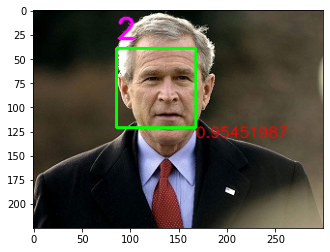

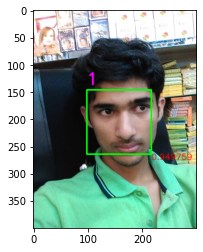

In [42]:
import cv2
for img_name in os.listdir('test/'):
  if img_name=='crop_img.jpg':
    continue
  # Load Image
  img=cv2.imread('test/'+img_name)
  gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Detect Faces
  rects=dnnFaceDetector(gray,1)
  left,top,right,bottom=0,0,0,0
  for (i,rect) in enumerate(rects):
    # Extract Each Face
    left=rect.rect.left() #x1
    top=rect.rect.top() #y1
    right=rect.rect.right() #x2
    bottom=rect.rect.bottom() #y2
    width=right-left
    height=bottom-top
    img_crop=img[top:top+height,left:left+width]
    cv2.imwrite('test/crop_img.jpg',img_crop)
    
    # Get Embeddings
    crop_img=load_img('test/crop_img.jpg',target_size=(224,224))
    crop_img=img_to_array(crop_img)
    crop_img=np.expand_dims(crop_img,axis=0)
    crop_img=preprocess_input(crop_img)
    img_encode=vgg_face(crop_img)

    # Make Predictions
    embed=K.eval(img_encode)
    person=classifier_model.predict(embed)
    name=person_rep[np.argmax(person)]
    os.remove('test/crop_img.jpg')
    cv2.rectangle(img,(left,top),(right,bottom),(0,255,0), 2)
    img=cv2.putText(img,name,(left,top-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,255),2,cv2.LINE_AA)
    img=cv2.putText(img,str(np.max(person)),(right,bottom+10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
  # Save images with bounding box,name and accuracy 
  cv2.imwrite('v1Predictions/'+img_name,img)
  plot(img)